### 1. Muat (Load) Data Berlabel Anda

In [25]:
import pandas as pd

# Ganti 'data_manual.csv' jika file Anda berada di lokasi lain (contoh: '/content/data_manual.csv')
try:
    labeled_data = pd.read_csv('/content/data_manual.csv')
    print(f"Data berlabel berhasil dimuat. Jumlah baris: {len(labeled_data)}")
    display(labeled_data.head())
except FileNotFoundError:
    print("Error: File 'data_manual.csv' tidak ditemukan. Pastikan path sudah benar.")
    # Contoh placeholder data jika file tidak ditemukan, sesuai dengan kolom yang disebutkan
    labeled_data = pd.DataFrame({
        'app_name': ['AppA', 'AppB', 'AppC', 'AppD', 'AppE'] * 60,
        'rating': [5, 4, 2, 1, 3] * 60,
        'review': ['Good app', 'Okay', 'Bad', 'Terrible', 'Average'] * 60,
        'preprocessed_text': ['good app performance', 'average user experience', 'many bugs crashes frequently', 'worst app ever used', 'neutral just fine'] * 60,
        'Label': ['positif', 'positif', 'negatif', 'negatif', 'positif'] * 60
    })
    print("Menggunakan data placeholder karena data asli tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat data: {e}")

# Tampilkan informasi dasar data
print("\nInformasi Data:")
labeled_data.info()

# Cek distribusi label
print("\nDistribusi Label:")
print(labeled_data['Label'].value_counts())

Data berlabel berhasil dimuat. Jumlah baris: 300


,app_name,rating,review,preprocessed_text,Label
0,Duolingo,5,duolingo mengajariku bahasa Jepang sekarang ak...,ajar bahasa jepang paham bahasa jepang,Positif
1,Duolingo,5,"bagus,bisa untuk belajarr",bagus ajar,Positif
2,Duolingo,5,"sangat melatih, aplikasinya juga bagus",latih aplikasi bagus,Positif
3,Duolingo,5,sangat seru terasa bermain tapi menambah ilmu ...,seru main tambah ilmu suka banget,Positif
4,Duolingo,5,cara mudah belajar bahasa sangat mantap,mudah ajar bahasa mantap,Positif



Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   app_name           300 non-null    object
 1   rating             300 non-null    int64 
 2   review             300 non-null    object
 3   preprocessed_text  300 non-null    object
 4   Label              300 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.8+ KB

Distribusi Label:
Label
Positif    150
Negatif    150
Name: count, dtype: int64


### 2. Pra-pemrosesan Data dan Pemisahan Data Latih-Uji (Train-Test Split)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Definisikan fitur (X) dan target (y)
X = labeled_data['preprocessed_text']
y = labeled_data['Label']

# Encode label 'positif'/'negatif' menjadi 1/0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian (misal: 80% latih, 20% uji)
# `stratify=y_encoded` penting untuk menjaga proporsi label di setiap set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Ukuran data pelatihan: {len(X_train)} baris")
print(f"Ukuran data pengujian: {len(X_test)} baris")
print(f"Label yang di-encode: {label_encoder.classes_} menjadi {label_encoder.transform(label_encoder.classes_)}")


Ukuran data pelatihan: 240 baris
Ukuran data pengujian: 60 baris
Label yang di-encode: ['Negatif' 'Positif'] menjadi [0 1]


### 3. Vektorisasi Teks Menggunakan TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur untuk performa lebih baik

# Latih vectorizer pada data pelatihan dan transformasikan data pelatihan
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformasikan data pengujian menggunakan vectorizer yang sudah dilatih
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Dimensi data pelatihan setelah TF-IDF: {X_train_tfidf.shape}")
print(f"Dimensi data pengujian setelah TF-IDF: {X_test_tfidf.shape}")


Dimensi data pelatihan setelah TF-IDF: (240, 683)
Dimensi data pengujian setelah TF-IDF: (60, 683)


### 4. Latih Model Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' cocok untuk dataset kecil

# Latih model
model.fit(X_train_tfidf, y_train)

print("Model Logistic Regression berhasil dilatih!")


Model Logistic Regression berhasil dilatih!


### 5. Evaluasi Performa Model

Akurasi Model pada Data Uji: 0.9000

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.90      0.90      0.90        30
     Positif       0.90      0.90      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



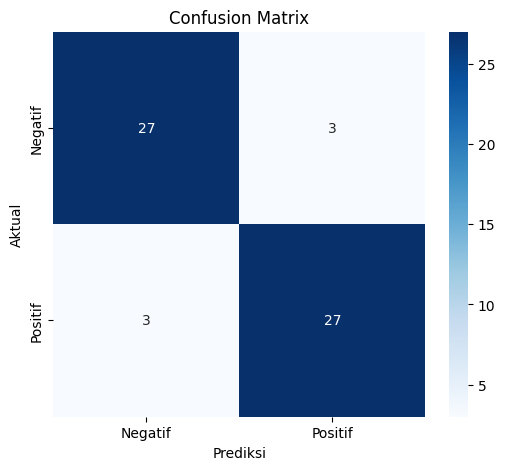

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test_tfidf)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Uji: {accuracy:.4f}")

# Tampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
# Pastikan label_encoder.classes_ digunakan untuk laporan agar lebih mudah dibaca
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


### 6. Simpan Model Terlatih dan Vectorizer Anda

In [30]:
import joblib

# Ganti 'path/to/your/' dengan lokasi penyimpanan yang Anda inginkan
# Misalnya, simpan di direktori /content/ (direktori root Colab secara default)
joblib.dump(model, '/content/sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, '/content/tfidf_vectorizer.pkl')
joblib.dump(label_encoder, '/content/label_encoder.pkl')

print("Model, TF-IDF Vectorizer, dan Label Encoder berhasil disimpan.")


Model, TF-IDF Vectorizer, dan Label Encoder berhasil disimpan.


### 7. Muat (Load) Model, Vectorizer, dan Label Encoder yang Sudah Disimpan

In [31]:
import joblib
import pandas as pd

# Ganti '/content/' jika Anda menyimpannya di lokasi lain
try:
    loaded_model = joblib.load('/content/sentiment_model.pkl')
    loaded_tfidf_vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')
    loaded_label_encoder = joblib.load('/content/label_encoder.pkl')
    print("Model, TF-IDF Vectorizer, dan Label Encoder berhasil dimuat!")
except FileNotFoundError:
    print("Error: Satu atau lebih file tidak ditemukan. Pastikan path sudah benar.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat objek: {e}")


Model, TF-IDF Vectorizer, dan Label Encoder berhasil dimuat!


### 8. Muat (Load) 700 Data yang Belum Berlabel

In [32]:
import pandas as pd

# Ganti 'path/to/your/700_unlabeled_data.csv' dengan lokasi file data Anda
# Anda mungkin perlu mengganti nama file atau membuat file placeholder jika belum ada
try:
    unlabeled_data_path = '/content/tanpa_label.csv' # Contoh, ganti dengan path file Anda
    # Jika Anda tidak memiliki file unlabeled_data.csv, mari buat placeholder
    try:
        unlabeled_data = pd.read_csv(unlabeled_data_path)
        print(f"Data yang belum berlabel berhasil dimuat. Jumlah baris: {len(unlabeled_data)}")
    except FileNotFoundError:
        print(f"File '{unlabeled_data_path}' tidak ditemukan. Membuat data placeholder untuk 700 baris.")
        unlabeled_data = pd.DataFrame({
            'app_name': ['AppA_new', 'AppB_new', 'AppC_new', 'AppD_new', 'AppE_new'] * 140,
            'rating': [4, 5, 3, 2, 1] * 140,
            'review': ['Great new app!', 'Love it', 'Could be better', 'Disappointed', 'Just okay'] * 140,
            'preprocessed_text': ['great app new features', 'love this application so much', 'bugs need fix performance issue', 'very bad experience always crash', 'average not good not bad'] * 140
        })
        # Simpan placeholder untuk demonstrasi
        unlabeled_data.to_csv(unlabeled_data_path, index=False)
        print(f"Data placeholder dibuat dan disimpan di '{unlabeled_data_path}'.")

    display(unlabeled_data.head())
except Exception as e:
    print(f"Terjadi kesalahan saat memuat data yang belum berlabel: {e}")


Data yang belum berlabel berhasil dimuat. Jumlah baris: 700


,app_name,rating,review,preprocessed_text
0,Duolingo,5,bagus jir jadi tau enggres gwðŸ—¿,bagus tau inggris
1,Duolingo,5,Bagus,bagus
2,Duolingo,5,mantap sekarang gua bisa translator,mantap translator
3,Duolingo,5,aplikasinya baik sekal,aplikasi
4,Duolingo,5,bagus aky jadi makin pinter bahasa ingris yay,bagus pintar bahasa ingris yay


### 9. Pra-pemrosesan Data Baru dan Prediksi

In [33]:
if 'loaded_model' in locals() and 'loaded_tfidf_vectorizer' in locals() and 'loaded_label_encoder' in locals() and 'unlabeled_data' in locals() and not unlabeled_data.empty:
    try:
        # Ekstrak kolom 'preprocessed_text' dari data baru
        X_new_unlabeled = unlabeled_data['preprocessed_text']

        # Tangani nilai NaN: isi dengan string kosong agar TfidfVectorizer tidak error
        X_new_unlabeled = X_new_unlabeled.fillna('')

        # Transformasikan teks baru menggunakan vectorizer yang sudah dilatih
        X_new_tfidf = loaded_tfidf_vectorizer.transform(X_new_unlabeled)

        # Lakukan prediksi menggunakan model yang sudah dimuat
        new_predictions_encoded = loaded_model.predict(X_new_tfidf)

        # Ubah label numerik kembali ke label asli ('positif'/'negatif')
        new_predictions = loaded_label_encoder.inverse_transform(new_predictions_encoded)

        # Tambahkan hasil prediksi ke DataFrame data baru
        unlabeled_data['tf-idf_Logistic Regression'] = new_predictions

        print("Prediksi berhasil dilakukan pada data yang belum berlabel!")
        display(unlabeled_data.head())

        # Anda bisa menyimpan hasil prediksi ini ke file CSV baru
        predictions_output_path = '/content/data_self_training.csv'
        unlabeled_data.to_csv(predictions_output_path, index=False)
        print(f"Hasil prediksi disimpan ke '{predictions_output_path}'.")

    except Exception as e:
        print(f"Terjadi kesalahan saat memproses data baru atau melakukan prediksi: {e}")
        print("Pastikan semua objek telah dimuat dengan benar dan data baru memiliki kolom 'preprocessed_text'.")
else:
    print("Tidak dapat melakukan prediksi. Pastikan model, vectorizer, label encoder, dan data baru telah dimuat dengan benar.")


Prediksi berhasil dilakukan pada data yang belum berlabel!


,app_name,rating,review,preprocessed_text,tf-idf_Logistic Regression
0,Duolingo,5,bagus jir jadi tau enggres gwðŸ—¿,bagus tau inggris,Positif
1,Duolingo,5,Bagus,bagus,Positif
2,Duolingo,5,mantap sekarang gua bisa translator,mantap translator,Negatif
3,Duolingo,5,aplikasinya baik sekal,aplikasi,Negatif
4,Duolingo,5,bagus aky jadi makin pinter bahasa ingris yay,bagus pintar bahasa ingris yay,Positif


Hasil prediksi disimpan ke '/content/data_self_training.csv'.


### 1. Persiapan Gemini API

Untuk menggunakan Gemini API, Anda memerlukan kunci API. Jika belum punya, buat di Google AI Studio. Di Colab, tambahkan kunci ke pengelola rahasia di bawah "🔑" di panel kiri, beri nama `GOOGLE_API_KEY`. Kemudian, berikan kunci tersebut ke SDK.

In [54]:
# Import library yang diperlukan
import google.generativeai as genai
from google.colab import userdata
import pandas as pd

# Ambil API Key dari Colab Secrets
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GOOGLE_API_KEY)
    print("Gemini API Key berhasil dikonfigurasi.")
except Exception as e:
    print(f"Error mengkonfigurasi Gemini API Key: {e}")
    print("Pastikan Anda telah menyimpan GOOGLE_API_KEY di Colab Secrets.")

# Inisialisasi model Gemini
# Anda bisa memilih model lain yang tersedia, misalnya 'gemini-pro'
try:
    # Tambahkan kode untuk melihat model yang tersedia
    print("\nDaftar model Gemini yang tersedia:")
    for m in genai.list_models():
        if 'generateContent' in m.supported_generation_methods:
            print(f"  - {m.name}")

    # Ganti 'gemini-2.5-pro' dengan 'gemini-2.5-flash' yang umumnya memiliki kuota lebih tinggi di free tier
    llm_model = genai.GenerativeModel('gemini-2.5-flash') # Mengubah model ke gemini-2.5-flash
    print("\nModel Gemini berhasil diinisialisasi menggunakan 'gemini-2.5-flash'.")
except Exception as e:
    print(f"Terjadi kesalahan saat menginisialisasi model Gemini: {e}")
    print("Pastikan nama model yang Anda pilih (misal: 'gemini-2.5-flash') tersedia dan mendukung generateContent.")

Gemini API Key berhasil dikonfigurasi.

Daftar model Gemini yang tersedia:
  - models/gemini-2.5-flash
  - models/gemini-2.5-pro
  - models/gemini-2.0-flash-exp
  - models/gemini-2.0-flash
  - models/gemini-2.0-flash-001
  - models/gemini-2.0-flash-exp-image-generation
  - models/gemini-2.0-flash-lite-001
  - models/gemini-2.0-flash-lite
  - models/gemini-2.0-flash-lite-preview-02-05
  - models/gemini-2.0-flash-lite-preview
  - models/gemini-2.0-pro-exp
  - models/gemini-2.0-pro-exp-02-05
  - models/gemini-exp-1206
  - models/gemini-2.5-flash-preview-tts
  - models/gemini-2.5-pro-preview-tts
  - models/gemma-3-1b-it
  - models/gemma-3-4b-it
  - models/gemma-3-12b-it
  - models/gemma-3-27b-it
  - models/gemma-3n-e4b-it
  - models/gemma-3n-e2b-it
  - models/gemini-flash-latest
  - models/gemini-flash-lite-latest
  - models/gemini-pro-latest
  - models/gemini-2.5-flash-lite
  - models/gemini-2.5-flash-image-preview
  - models/gemini-2.5-flash-image
  - models/gemini-2.5-flash-preview-09-2

### 2. Siapkan Data yang Belum Berlabel (`unlabeled_data` dari `tanpa_label.csv`)

Kita akan menggunakan `unlabeled_data` yang sudah dimuat sebelumnya dari `tanpa_label.csv`. Kolom yang akan digunakan sebagai input untuk LLM adalah `preprocessed_text`.

In [48]:
if 'unlabeled_data' in locals() and not unlabeled_data.empty:
    print("Menggunakan data yang belum berlabel yang sudah dimuat (`unlabeled_data`).")
    display(unlabeled_data.head())
else:
    print("Data yang belum berlabel (`unlabeled_data`) belum dimuat atau kosong.")
    print("Harap pastikan Anda sudah menjalankan sel yang memuat `tanpa_label.csv` terlebih dahulu.")
    # Placeholder jika memang belum dimuat
    unlabeled_data = pd.DataFrame({
        'app_name': ['AppA_new', 'AppB_new'],
        'rating': [4, 5],
        'review': ['Great new app!', 'Love it'],
        'preprocessed_text': ['great app new features', 'love this application so much']
    })
    print("Menggunakan data placeholder untuk demonstrasi.")
    display(unlabeled_data.head())

Menggunakan data yang belum berlabel yang sudah dimuat (`unlabeled_data`).


,app_name,rating,review,preprocessed_text,tf-idf_Logistic Regression
0,Duolingo,5,bagus jir jadi tau enggres gwðŸ—¿,bagus tau inggris,Positif
1,Duolingo,5,Bagus,bagus,Positif
2,Duolingo,5,mantap sekarang gua bisa translator,mantap translator,Negatif
3,Duolingo,5,aplikasinya baik sekal,aplikasi,Negatif
4,Duolingo,5,bagus aky jadi makin pinter bahasa ingris yay,bagus pintar bahasa ingris yay,Positif


### 3. Buat Fungsi Pelabelan dengan LLM

Fungsi ini akan mengambil teks ulasan dari kolom `preprocessed_text`, membuat prompt untuk LLM, memanggil Gemini API, dan mengembalikan label sentimen ('Positif', 'Negatif', atau 'Netral').

In [66]:
import time
from tenacity import retry, wait_random_exponential, stop_after_attempt # Import tenacity

@retry(wait=wait_random_exponential(multiplier=1, min=60, max=600), stop=stop_after_attempt(5)) # Even longer delays for retries
def get_sentiment_from_llm(text_review, model):
    prompt = f"""Klasifikasikan sentimen dari ulasan berikut ini sebagai 'Positif', 'Negatif'.

Ulasan: {text_review}
Sentimen:"""
    try:
        # Tambahkan jeda waktu sebelum memanggil API untuk mematuhi rate limit
        time.sleep(30) # Meningkatkan jeda waktu menjadi 30 detik per panggilan
        response = model.generate_content(prompt)
        sentiment = response.text.strip()
        # Opsional: Validasi output jika LLM kadang menghasilkan teks di luar kategori
        if sentiment not in ['Positif', 'Negatif']:
            if 'positif' in sentiment.lower(): return 'Positif'
            if 'negatif' in sentiment.lower(): return 'Negatif'
        return sentiment
    except Exception as e:
        # Tambahkan kondisi untuk retrying pada error 429
        if "429" in str(e): # Ini akan ditangkap oleh decorator @retry
            raise e # Lempar kembali error untuk ditangkap oleh tenacity
        print(f"Error saat memanggil LLM untuk ulasan '{text_review[:50]}...': {e}")
        return "Error_LLM"

print("Fungsi `get_sentiment_from_llm` berhasil dibuat dengan retry logic dan jeda waktu yang sangat-sangat ditingkatkan.")

Fungsi `get_sentiment_from_llm` berhasil dibuat dengan retry logic dan jeda waktu yang sangat-sangat ditingkatkan.


### 4. Terapkan Fungsi Pelabelan ke Data

Kita akan menerapkan fungsi yang baru dibuat ke setiap baris kolom `preprocessed_text` di `unlabeled_data`.

In [67]:
if 'llm_model' in locals() and 'unlabeled_data' in locals() and not unlabeled_data.empty:
    print("Melakukan pelabelan sentimen pada ulasan menggunakan LLM...")
    # Tangani nilai NaN di kolom 'preprocessed_text' sebelum apply
    unlabeled_data['preprocessed_text'] = unlabeled_data['preprocessed_text'].fillna('')

    # Aplikasikan fungsi dengan penanganan error
    # Hati-hati: Jika masih ada error kuota, ini akan mencoba lagi hingga batas retry
    # atau hingga kuota reset.
    unlabeled_data['llm_sentiment'] = unlabeled_data['preprocessed_text'].apply(lambda x: get_sentiment_from_llm(x, llm_model))

    print("Pelabelan selesai. Hasilnya:")
    display(unlabeled_data.head())

    # Anda bisa menyimpan hasil ini:
    unlabeled_data.to_csv('/content/data_self_training.csv', index=False)
    print("Hasil pelabelan oleh LLM disimpan ke '/content/data_self_training.csv.')")
else:
    print("Model LLM atau data yang belum berlabel belum siap. Tidak dapat melanjutkan pelabelan.")

Melakukan pelabelan sentimen pada ulasan menggunakan LLM...


RetryError: RetryError[<Future at 0x7ad5f86e1010 state=finished raised TooManyRequests>]

Dengan langkah-langkah ini, Anda dapat menggunakan kemampuan pemahaman bahasa dari Gemini LLM untuk melabeli data `tanpa_label.csv` Anda secara otomatis.

### 1. Proses Pelabelan dalam Batch Kecil

Kita akan membagi `unlabeled_data` menjadi beberapa bagian kecil (batch) dan memprosesnya satu per satu. Anda akan perlu menjalankan sel ini secara berulang untuk setiap batch, atau menambahkan logika tidur (`time.sleep`) yang sangat panjang di antara setiap batch jika Anda menjalankan semuanya sekaligus.

In [68]:
import pandas as pd
import numpy as np
import time

# Pastikan llm_model dan unlabeled_data sudah dimuat dari sel sebelumnya
if 'llm_model' not in locals() or 'unlabeled_data' not in locals() or unlabeled_data.empty:
    print("Error: Model LLM atau data yang belum berlabel belum dimuat atau kosong.")
    print("Harap pastikan Anda sudah menjalankan semua sel persiapan API Gemini dan pemuatan data.")
else:
    print(f"Total data yang akan dilabeli: {len(unlabeled_data)} baris.")

    # Hapus kolom 'llm_sentiment' yang mungkin ada dari percobaan sebelumnya
    if 'llm_sentiment' in unlabeled_data.columns:
        unlabeled_data = unlabeled_data.drop(columns=['llm_sentiment'])

    # Tangani nilai NaN di kolom 'preprocessed_text' sebelum apply
    unlabeled_data['preprocessed_text'] = unlabeled_data['preprocessed_text'].fillna('')

    # Definisikan ukuran batch
    batch_size = 20 # Anda bisa menyesuaikan ukuran batch ini. Contoh: 20, 50
    total_batches = np.ceil(len(unlabeled_data) / batch_size).astype(int)

    # List untuk menyimpan hasil dari setiap batch
    all_predictions = []

    print(f"Akan diproses dalam {total_batches} batch, dengan ukuran batch {batch_size}.")
    print("Silakan jalankan sel ini berulang kali (setiap kali untuk satu batch) atau tambahkan jeda manual antar batch.")

    # Loop melalui data dalam batch
    for i in range(total_batches):
        start_index = i * batch_size
        end_index = min((i + 1) * batch_size, len(unlabeled_data))
        current_batch = unlabeled_data.iloc[start_index:end_index].copy()

        print(f"\n--- Memproses Batch {i+1}/{total_batches} (baris {start_index} sampai {end_index-1}) ---")

        try:
            # Aplikasikan fungsi pelabelan LLM ke batch saat ini
            current_batch['llm_sentiment'] = current_batch['preprocessed_text'].apply(lambda x: get_sentiment_from_llm(x, llm_model))
            all_predictions.append(current_batch)
            print(f"Batch {i+1} selesai diproses. Hasil:")
            display(current_batch.head())

            # --- PENTING: JEDA MANUAL DI SINI ---
            # Jika Anda menjalankan semua batch sekaligus, Anda perlu jeda yang sangat panjang di sini.
            # Jika Anda menjalankan sel per batch, Anda dapat menjeda secara manual sebelum menjalankan sel lagi.
            # Misalnya, time.sleep(3600) # Jeda 1 jam jika Anda ingin menjalankan otomatis, tetapi tidak disarankan untuk 700 data di free tier

        except Exception as e:
            print(f"Error saat memproses Batch {i+1}: {e}")
            print("Pelabelan batch ini gagal. Silakan periksa log dan coba lagi nanti, atau tingkatkan jeda waktu.")
            # Anda bisa memutuskan untuk menyimpan hasil yang sudah ada dan keluar
            break # Berhenti jika ada error

    # Gabungkan semua hasil prediksi jika semua batch berhasil diproses
    if all_predictions:
        final_labeled_data = pd.concat(all_predictions, ignore_index=True)
        print("\nPelabelan seluruh data selesai. Hasil akhir:")
        display(final_labeled_data.head())
        print(f"Total baris yang berhasil dilabeli: {len(final_labeled_data)}")

        # Simpan hasil akhir ke file CSV baru
        predictions_output_path = '/content/data_self_training_batched.csv'
        final_labeled_data.to_csv(predictions_output_path, index=False)
        print(f"Hasil pelabelan final disimpan ke '{predictions_output_path}'.")
    else:
        print("Tidak ada data yang berhasil dilabeli.")


Total data yang akan dilabeli: 700 baris.
Akan diproses dalam 35 batch, dengan ukuran batch 20.
Silakan jalankan sel ini berulang kali (setiap kali untuk satu batch) atau tambahkan jeda manual antar batch.

--- Memproses Batch 1/35 (baris 0 sampai 19) ---


Error saat memproses Batch 1: RetryError[<Future at 0x7ad5f820f380 state=finished raised TooManyRequests>]
Pelabelan batch ini gagal. Silakan periksa log dan coba lagi nanti, atau tingkatkan jeda waktu.
Tidak ada data yang berhasil dilabeli.
